# GoogleColaboratoryでPlantUMLを使ってUMLを作る

タイトルのとおり、このnotebookではGoogleColaboratory環境に[PlantUML](https://plantuml.com/ja/)をインストールして、UMLを作成します。

## PlantUMLのインストール

### 環境の確認

#### OSを確認する

インストールする前に、まずはGoogleColaboratoryのOSを確認しておきます。

In [1]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


コマンドの実行結果から、Ubuntu 18.04.3 LTSということがわかります。

#### Javaがインストールされているか確認する

PlantUMLの実行にはJavaが必要なので、GoogleColaboratory環境にインストールされているか確認します。

In [2]:
!which java

/usr/bin/java


どうやらインストールされているようです。ちなみにバージョンは、

In [3]:
!java --version

openjdk 11.0.6 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


OpenJDKの11.0.6のようです。

### PlantUMLをインストールする

sourceforgeでホストされているplantumlのjarファイルを`/usr/loca/bin`へインストールします

In [4]:
!curl -L -o /usr/local/bin/plantuml.jar http://sourceforge.net/projects/plantuml/files/plantuml.jar/download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178  100   178    0     0   1028      0 --:--:-- --:--:-- --:--:--  1028
100 21190  100 21190    0     0  35854      0 --:--:-- --:--:-- --:--:-- 82773
100   313  100   313    0     0    332      0 --:--:-- --:--:-- --:--:--   332
100 8358k  100 8358k    0     0  6187k      0  0:00:01  0:00:01 --:--:--  100M


`ls`コマンドで確認しておきます

In [6]:
!ls -la /usr/local/bin/plant*

-rw-r--r-- 1 root root 8559351 Apr 30 13:25 /usr/local/bin/plantuml.jar


インストールできました。

### graphvizをインストール

シーケンス図・アクティビティ図以外のダイアグラムを作成する場合はGraphvizも必要なので、インストールしておきます。

In [7]:
!sudo apt-get install -y graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


### IPlantUMLをインストール

GoogleColatobatoryにPlantUMLのセルマジックを追加し、インラインSVGとして生成できるように、IPlantUMLもインストールします

In [8]:
!sudo pip install iplantuml

  Created wheel for iplantuml: filename=IPlantUML-0.1.1-py2.py3-none-any.whl size=4897 sha256=afc5be23c60bc3f2596072cd6ef33d2658197b2fcf0e08b9f8d81da62ca9582a
  Stored in directory: /root/.cache/pip/wheels/98/e3/22/5474b6852d1717733862688fe1d1470f749f1fe7ae0d508ce7
Successfully built iplantuml


## ダイアグラムをnotebookのインラインSVGとして作成する

環境が整ったので、iplantumlを使って、notebookに埋め込まれた形のUMLを作成してみます。

In [0]:
import iplantuml

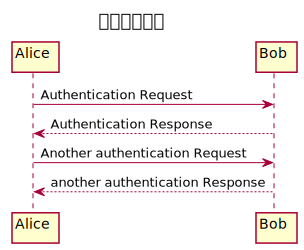

In [11]:
%%plantuml
@startuml
Title シーケンス図
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: another authentication Response
@enduml

できました。

[PlantUML言語リファレンスガイド](http://plantuml.com/ja/guide)
 に記載されている各ダイアグラムの文法に従えば、シーケンス図以外のダイアグラムも作成できます。

## テキストとダイアグラムをファイルとして作成する

PlantUMLのテキストや、そこから生成したダイアグラムをファイルとして保存したい場合には、以下のようにします。


### PantUMLのテキストファイルを作成する

wfitefileマジックコマンドを使って、PlantUMLのテキストを、`plantuml.uml`という名前で保存します。

In [21]:
%%writefile plantuml.uml

@startuml
Title sequence diagram
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response

Alice -> Bob: Another authentication Request
Alice <-- Bob: another authentication Response
@enduml

Overwriting plantuml.uml


ファイルができているか確認します。

In [22]:
!ls -l

total 16
-rw-r--r-- 1 root root 8171 Apr 30 13:51 plantuml.png
-rw-r--r-- 1 root root  210 Apr 30 13:54 plantuml.uml
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data


できていました。

### テキストファイルから画像を生成する

plantuml.jarを実行して、画像を生成します。

In [0]:
!java -jar /usr/local/bin/plantuml.jar plantuml.uml

正常終了するとアウトプットセルには何も出力されません。

`ls`コマンドで画像ファイルができているか確認します。

In [24]:
!ls -l

total 20
-rw-r--r-- 1 root root 9888 Apr 30 13:54 plantuml.png
-rw-r--r-- 1 root root  210 Apr 30 13:54 plantuml.uml
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data


できていました。

notebookに読み込んで確認してみます。

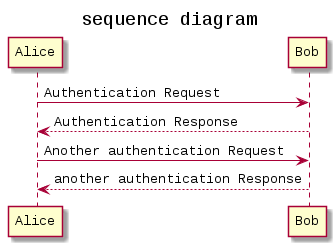

In [25]:
from IPython.display import Image
Image("./plantuml.png")

意図した通りの図になっています。

GoogleDriveのフォルダをColaboratory環境にマウントすれば、ここで作成したファイルをGoogleDriveへ直接保存することができます。